# Groupby操作

In [2]:
import pandas as pd
import numpy as np

在处理金融时间数据时，我们经常会遇到长格式数据：

In [3]:
df_wide = pd.DataFrame(np.random.randn(10, 10),
                  index=pd.date_range("2018-01-01", periods=10, name="trade_date"),
                  columns=pd.Index(["000001.SZ", "000002.SZ", "000003.SZ", "000004.SZ", "600000.SH", "600001.SH", "600002.SH", "600003.SH", "600004.SH", "600005.SH"], name="code"))
df_long = df_wide.stack(-1).reset_index()
df_long.rename({0: "return"},axis=1, inplace=True)
ser = df_long["code"].map({"000001.SZ": "finance", "000002.SZ": "finance", 
                           "000003.SZ": "finance", "000004.SZ": "finance", 
                           "600000.SH": "finance", "600001.SH": "IT",  
                           "600002.SH": "IT", "600003.SH": "IT", 
                           "600004.SH": "IT", "600005.SH": "IT"})
df_long.insert(1, "industry", ser)
df_long

,trade_date,industry,code,return
0,2018-01-01,finance,000001.SZ,0.181138
1,2018-01-01,finance,000002.SZ,-0.620575
2,2018-01-01,finance,000003.SZ,1.357720
3,2018-01-01,finance,000004.SZ,0.578658
4,2018-01-01,finance,600000.SH,-1.202307
5,2018-01-01,IT,600001.SH,-0.420071
6,2018-01-01,IT,600002.SH,-1.475843
7,2018-01-01,IT,600003.SH,-0.875738
8,2018-01-01,IT,600004.SH,-1.763412
9,2018-01-01,IT,600005.SH,-0.364206


如果需要对这种类型的数据进行分组统计，就需要用到groupby

例如，计算每天，每个行业的平均收益率

In [4]:
df_long.groupby(["trade_date", "industry"]).mean()

return
trade_date industry          
2018-01-01 IT       -0.979854
           finance   0.058927
2018-01-02 IT        0.134783
           finance   0.056224
2018-01-03 IT        0.143521
           finance  -0.354444
2018-01-04 IT       -0.121574
           finance  -0.221318
2018-01-05 IT       -0.071957
           finance   0.369501
2018-01-06 IT        0.644858
           finance   0.964728
2018-01-07 IT        0.163681
           finance  -0.839935
2018-01-08 IT       -0.589236
           finance   0.052421
2018-01-09 IT       -0.552685
           finance   0.015992
2018-01-10 IT        0.079639
           finance   0.286154

求和就是用sum

In [5]:
df_long.groupby(["trade_date", "industry"]).sum()

return
trade_date industry          
2018-01-01 IT       -4.899270
           finance   0.294634
2018-01-02 IT        0.673916
           finance   0.281121
2018-01-03 IT        0.717606
           finance  -1.772222
2018-01-04 IT       -0.607868
           finance  -1.106592
2018-01-05 IT       -0.359784
           finance   1.847504
2018-01-06 IT        3.224292
           finance   4.823638
2018-01-07 IT        0.818407
           finance  -4.199676
2018-01-08 IT       -2.946180
           finance   0.262106
2018-01-09 IT       -2.763423
           finance   0.079961
2018-01-10 IT        0.398195
           finance   1.430771

当然不仅仅只支持这两个函数，基本的统计函数都是支持的

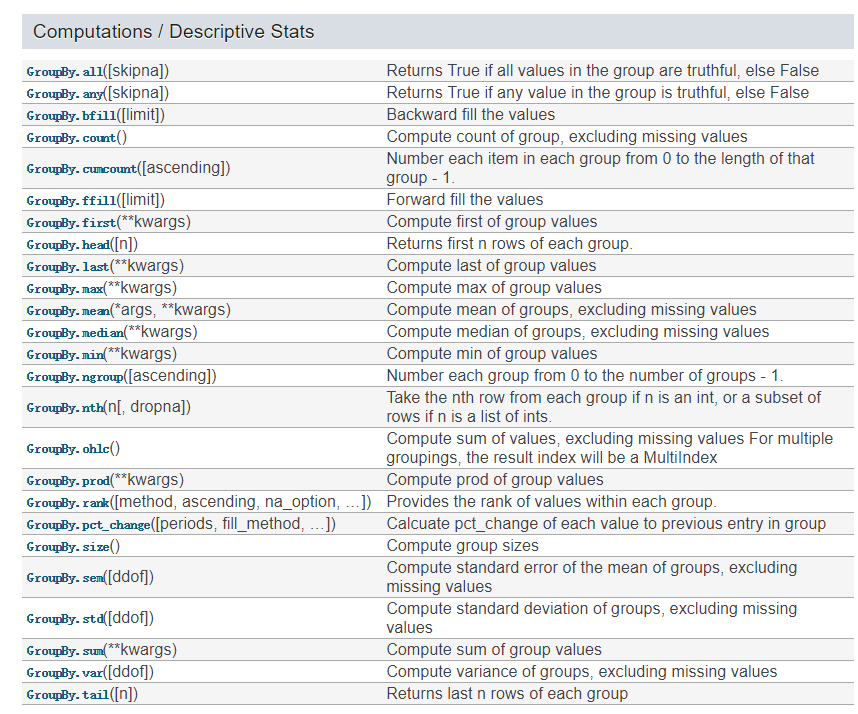

同样，groupby支持apply方法，通过自定义函数，设计自己个性化的操作

但是这有个问题，就是不好知道函数的输入和输出应该是什么，此时我们仍然使用在函数里加print的小技巧 

In [6]:
def myfun(x):
    print(type(x), "\n")
    print(x, "\n\n\n")
    return x.loc[:, ["return"]].T
df_long.groupby(["trade_date", "industry"]).apply(myfun)

<class 'pandas.core.frame.DataFrame'> 

  trade_date industry       code    return
5 2018-01-01       IT  600001.SH -0.420071
6 2018-01-01       IT  600002.SH -1.475843
7 2018-01-01       IT  600003.SH -0.875738
8 2018-01-01       IT  600004.SH -1.763412
9 2018-01-01       IT  600005.SH -0.364206 



<class 'pandas.core.frame.DataFrame'> 

  trade_date industry       code    return
5 2018-01-01       IT  600001.SH -0.420071
6 2018-01-01       IT  600002.SH -1.475843
7 2018-01-01       IT  600003.SH -0.875738
8 2018-01-01       IT  600004.SH -1.763412
9 2018-01-01       IT  600005.SH -0.364206 



<class 'pandas.core.frame.DataFrame'> 

  trade_date industry       code    return
0 2018-01-01  finance  000001.SZ  0.181138
1 2018-01-01  finance  000002.SZ -0.620575
2 2018-01-01  finance  000003.SZ  1.357720
3 2018-01-01  finance  000004.SZ  0.578658
4 2018-01-01  finance  600000.SH -1.202307 



<class 'pandas.core.frame.DataFrame'> 

   trade_date industry       code    return
15 2018-01

90        91        92        93        94
trade_date industry                                                         
2018-01-01 IT       return -0.420071 -1.475843 -0.875738 -1.763412 -0.364206
           finance  return  0.181138 -0.620575  1.357720  0.578658 -1.202307
2018-01-02 IT       return  1.886091 -0.254063 -0.312342  0.058980 -0.704751
           finance  return -0.215441  1.878217  0.885557 -1.408740 -0.858472
2018-01-03 IT       return  1.521506  0.501957  0.474788 -0.099465 -1.681179
           finance  return -0.410214  0.407675 -0.517529 -0.706687 -0.545466
2018-01-04 IT       return  2.026451 -0.184095 -1.304236 -0.393476 -0.752512
           finance  return  0.216167 -0.082542  0.462316 -1.269418 -0.433113
2018-01-05 IT       return -1.016844  0.280763 -0.186838  0.429050  0.134085
           finance  return -1.150968  1.133461  1.504086  0.288765  0.072161
2018-01-06 IT       return  0.576961 -0.601264  1.591727  0.282624  1.374244
           finance  return  0.462586  1.538263  1.489468 -0.079694  1.413015
2018-01-07 IT       return -0.727650  0.204166  0.404311  0.663566  0.274014
           finance  return -0.802658  0.801503 -2.306507 -1.076168 -0.815845
2018-01-08 IT       return -1.591353  0.389690 -0.403578 -1.864180  0.523241
           finance  return -0.161428  0.635889  0.257796  0.139327 -0.609478
2018-01-09 IT       return  0.416142 -0.566455 -0.500760 -0.478968 -1.633382
           finance  return -0.700699  1.318935  0.145525 -1.296479  0.612678
2018-01-10 IT       return  0.152568  0.718322  1.073163 -1.224608 -0.321249
           finance  return  0.763720  1.114411 -1.313235  0.525201  0.340675

可以发现，原来groupby的本质就是将一个DataFrame按照几列进行分组，分成几个小DataFrame，再将这些小的DataFrame分别传给apply接收的函数，得到结果后，组合在一起，也就是：


### 分组，计算，聚合的过程